This is an analysis of users' Fitbit activity, which will help us derive insights for BellaBeats Marketing efforts.

In [294]:
import numpy as np  
import pandas as pd 


#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.9.2


In [7]:
df_dailyanalysis = pd.read_csv('daily_analysis.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [8]:
df_dailyanalysis.head()


,id,ActivityDate,Calories,Id:1,ActivityDate:1,TotalSteps,TotalDistance,TrackerDistance,LoggedActivities,VeryActiveDistance,...,LightlyActiveMinutes:1,FairlyActiveMinutes:1,VeryActiveMinutes:1,SedentaryActiveDistance:1,LightActiveDistance:1,ModeratelyActiveDistance:1,VeryActiveDistance:1,Id:3,ActivityDay:1,StepTotal
0,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,13162
1,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,10735
2,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,10460
3,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,9762
4,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,12669


In [5]:
df_dailyanalysis.tail()

,id,ActivityDate,Calories,Id:1,ActivityDate:1,TotalSteps,TotalDistance,TrackerDistance,LoggedActivities,VeryActiveDistance,...,LightlyActiveMinutes:1,FairlyActiveMinutes:1,VeryActiveMinutes:1,SedentaryActiveDistance:1,LightActiveDistance:1,ModeratelyActiveDistance:1,VeryActiveDistance:1,Id:3,ActivityDay:1,StepTotal
7335180,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,227,0,0,0.0,3.95,0.0,0.00,2347167796,NaN,42
7335181,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10113
7335182,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10352
7335183,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10129
7335184,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10465


In [6]:
df_dailyanalysis.columns

Index(['id', 'ActivityDate', 'Calories', 'Id:1', 'ActivityDate:1',
       'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivities',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories:1',
       'loggedactivitiesdistance', 'Id:2', 'ActivityDay', 'SedentaryMinutes:1',
       'LightlyActiveMinutes:1', 'FairlyActiveMinutes:1',
       'VeryActiveMinutes:1', 'SedentaryActiveDistance:1',
       'LightActiveDistance:1', 'ModeratelyActiveDistance:1',
       'VeryActiveDistance:1', 'Id:3', 'ActivityDay:1', 'StepTotal'],
      dtype='object')

In [9]:
ActiveDistance = df_dailyanalysis[['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']]

In [10]:
print(ActiveDistance)

# ActiveDistance.set_index('id')
ActiveDistance

         SedentaryActiveDistance  LightActiveDistance  \
0                            0.0                 6.06   
1                            0.0                 6.06   
2                            0.0                 6.06   
3                            0.0                 6.06   
4                            0.0                 6.06   
...                          ...                  ...   
7335180                      0.0                 3.79   
7335181                      0.0                 3.79   
7335182                      0.0                 3.79   
7335183                      0.0                 3.79   
7335184                      0.0                 3.79   

         ModeratelyActiveDistance  VeryActiveDistance  
0                            0.55                1.88  
1                            0.55                1.88  
2                            0.55                1.88  
3                            0.55                1.88  
4                            0.55  

,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,0.0,6.06,0.55,1.88
1,0.0,6.06,0.55,1.88
2,0.0,6.06,0.55,1.88
3,0.0,6.06,0.55,1.88
4,0.0,6.06,0.55,1.88
...,...,...,...,...
7335180,0.0,3.79,0.86,0.79
7335181,0.0,3.79,0.86,0.79
7335182,0.0,3.79,0.86,0.79
7335183,0.0,3.79,0.86,0.79


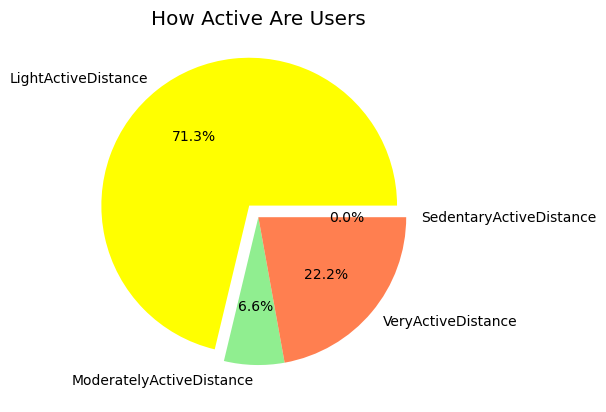

In [46]:
ActiveDistance = ActiveDistance[:1000]

ActiveDistance = ActiveDistance.transpose()

howactive = ActiveDistance.sum(axis=0)

fig,ax=plt.subplots()

max_index = howactive.argmax()
explode = [0] * len(howactive)  
explode[max_index] = 0.1 

ax.pie(howactive[0:4], labels=ActiveDistance[0:4],  # Replace with your labels
colors=['gold', 'yellow', 'lightgreen', 'coral'],
autopct='%1.1f%%', explode=explode)  

ax.set_aspect('equal')  

plt.title('How Active Are Users')

plt.show()


Users are mostly working out for a light active distance.

In [50]:
ActiveMinutes = df_dailyanalysis[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]

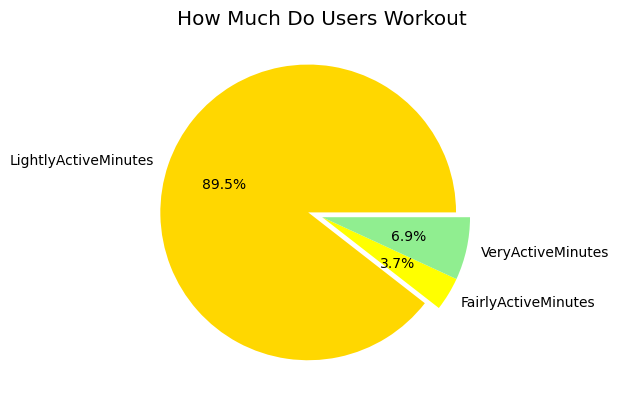

In [54]:
ActiveMinutes = ActiveMinutes[:1000]
ActiveMinutes.head()

ActiveMinutes = ActiveMinutes.transpose()

timeactive = ActiveMinutes.sum()

fig,ax=plt.subplots()

max_index = timeactive.argmax()
explode = [0] * len(timeactive)  
explode[max_index] = 0.1 

ax.pie(timeactive[0:3], labels=ActiveMinutes[0:3],  # Replace with your labels
colors=['gold', 'yellow', 'lightgreen'],
autopct='%1.1f%%', explode=explode)  

ax.set_aspect('equal')  

plt.title('How Much Do Users Workout')

plt.show()


Most users are active for a light amount of time each day

In [14]:
Cal_Steps = df_dailyanalysis[['Calories','TotalSteps','TotalDistance']]

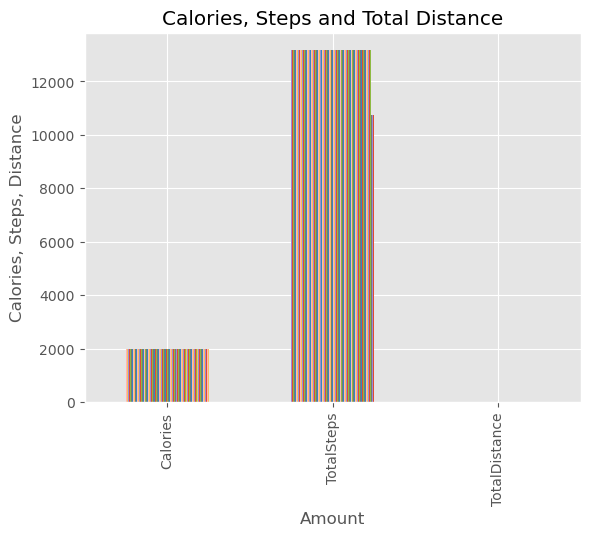

In [15]:
Cal_Steps = Cal_Steps[:1000]
Cal_Steps.head()

Cal_Steps = Cal_Steps.transpose()


Cal_Steps.plot(kind='bar')


plt.title('Calories, Steps and Total Distance')
plt.ylabel('Calories, Steps, Distance')
plt.xlabel('Amount')


plt.legend().remove()


plt.show()

In [16]:
Cal_Steps.loc['Calories'].describe()

count    1000.0
mean     1985.0
std         0.0
min      1985.0
25%      1985.0
50%      1985.0
75%      1985.0
max      1985.0
Name: Calories, dtype: float64

The average calories per day is 1985.

In [18]:
Cal_Steps.loc['TotalSteps'].describe()

count     1000.000000
mean     13067.347000
std        470.090018
min      10735.000000
25%      13162.000000
50%      13162.000000
75%      13162.000000
max      13162.000000
Name: TotalSteps, dtype: float64

The average total steps walked in a day are 13067

In [20]:
Cal_Steps.loc['TotalDistance'].describe()

count    1000.000000
mean        8.440330
std         0.296349
min         6.970000
25%         8.500000
50%         8.500000
75%         8.500000
max         8.500000
Name: TotalDistance, dtype: float64

The average total distance covered in one day is 8.44 miles, but are they all walked?

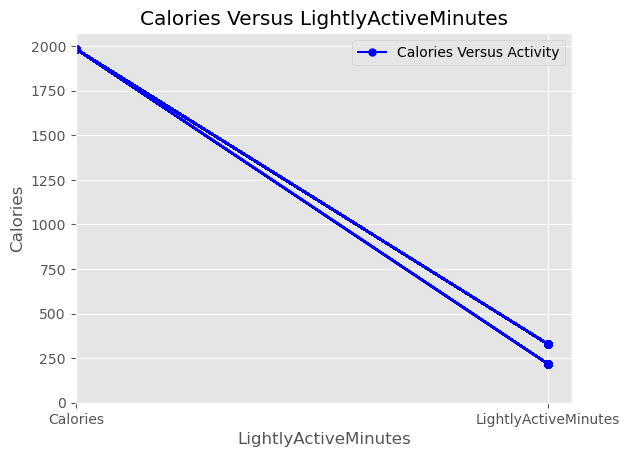

In [158]:
Cal_Minutes = df_dailyanalysis[['Calories','LightlyActiveMinutes']]

Cal_Minutes = Cal_Minutes[:1000]
Cal_Minutes = Cal_Minutes.transpose()
Cal_Minutes.head()

fig, ax = plt.subplots()


ax.plot(Cal_Minutes,
        marker='o', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='blue', #Changing the color of the line
        linestyle="solid")
ax.set_xlim(left=0)   # Ensure the x-axis starts at 0
ax.set_ylim(bottom=0) 
ax.set_title('Calories Versus LightlyActiveMinutes') 

ax.set_xlabel('LightlyActiveMinutes')
ax.set_ylabel('Calories')
ax.legend(['Calories Versus Activity'])

plt.show()




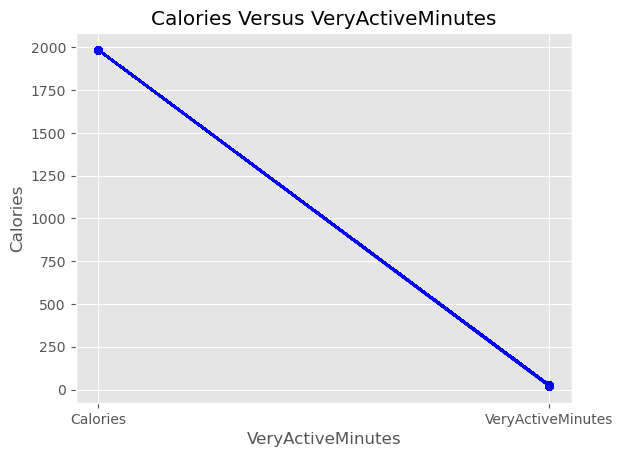

In [160]:
Cal_Minutes2 = df_dailyanalysis[['Calories','VeryActiveMinutes']]

Cal_Minutes2 = Cal_Minutes2[:1000]
Cal_Minutes2 = Cal_Minutes2.transpose()
Cal_Minutes2.head()

fig, ax = plt.subplots()


ax.plot(Cal_Minutes2,
        marker='o', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='blue', #Changing the color of the line
        linestyle="solid")


ax.set_title('Calories Versus VeryActiveMinutes') 

ax.set_xlabel('VeryActiveMinutes')
ax.set_ylabel('Calories')


plt.show()

The more lightlyactive users are, there calories are lower.  Activity is negatively correlated with total calories.

In [162]:
df_hourlyanalysis = pd.read_csv('hourly_analysis.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


As users are more veryactive in a day, total calories decrease more drastically.

In [164]:
df_hourlyanalysis.head()

,Calories,totalintensity,averageintensity,steptotal
0,47,66,1.1,0
1,47,66,1.1,0
2,47,66,1.1,0
3,47,66,1.1,0
4,47,66,1.1,0


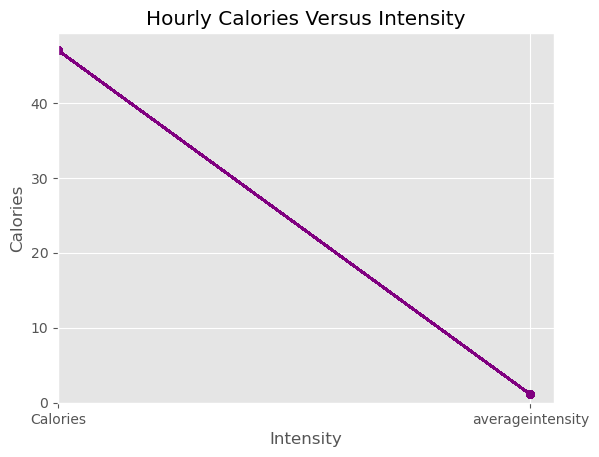

In [176]:
Cal_Intensity = df_hourlyanalysis[['Calories','averageintensity']]

Cal_Intensity = Cal_Intensity[:1000]
Cal_Intensity= Cal_Intensity.transpose()
Cal_Intensity.head()

fig, ax = plt.subplots()


ax.plot(Cal_Intensity,
        marker='o', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='purple', #Changing the color of the line
        linestyle="solid")
ax.set_xlim(left=0)   # Ensure the x-axis starts at 0
ax.set_ylim(bottom=0)

ax.set_title('Hourly Calories Versus Intensity') 

ax.set_xlabel('Intensity')
ax.set_ylabel('Calories')


plt.show()

As the hourly average intensity of workouts increases, the total calories decrease.  An increase in averageintensity is positively correlated with a decrease in total calories.  

Data read into a pandas dataframe!


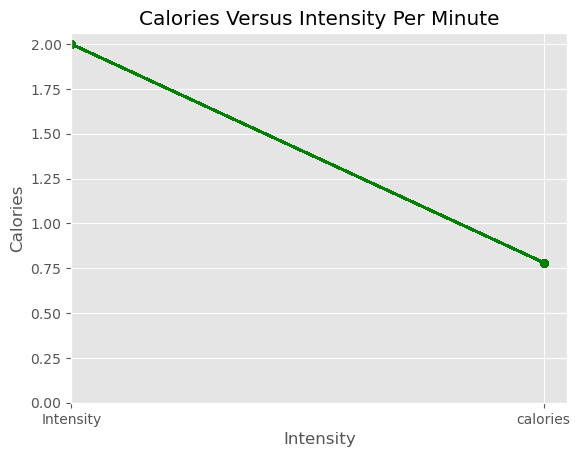

In [201]:
df_minuteanalysis = pd.read_csv('minute_analysis.csv')
print('Data read into a pandas dataframe!')

df_minuteanalysis.head()

CI_Minutes = df_minuteanalysis[['Intensity','calories']]

CI_Minutes = CI_Minutes[:1000]
CI_Minutes = CI_Minutes.transpose()


fig, ax = plt.subplots()


ax.plot(CI_Minutes,
        marker='o', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="solid")
ax.set_xlim(left=0)   # Ensure the x-axis starts at 0
ax.set_ylim(bottom=0)

ax.set_title('Calories Versus Intensity Per Minute') 

ax.set_xlabel('Intensity')
ax.set_ylabel('Calories')


plt.show()

Per minute, as intensity increases, calories decrease.  An increase in intensity is positively correlated with a decrease in calories.

In [304]:
df_heartandweight = pd.read_csv('heartrateandweightinfo.csv', low_memory=False)

print('Data read into a pandas dataframe!')

df_heartandweight = df_heartandweight[:10000]

df_heartandweight.head()

weight_bmi = df_heartandweight[['WeightPounds','BMI']]

weight_bmi = weight_bmi.astype(int)

weight_bmi = weight_bmi.transpose()
weight_bmi.head()

Data read into a pandas dataframe!


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
WeightPounds,152,152,153,154,154,152,152,153,154,154,...,152,152,153,154,154,152,152,153,154,154
BMI,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [274]:
weight = df_heartandweight['WeightPounds']
bmi = df_heartandweight['BMI']
bmi = bmi.astype(int)
weight = weight.astype(int)
weight.describe()

count    10000.000000
mean       153.000000
std          0.894472
min        152.000000
25%        152.000000
50%        153.000000
75%        154.000000
max        154.000000
Name: WeightPounds, dtype: float64

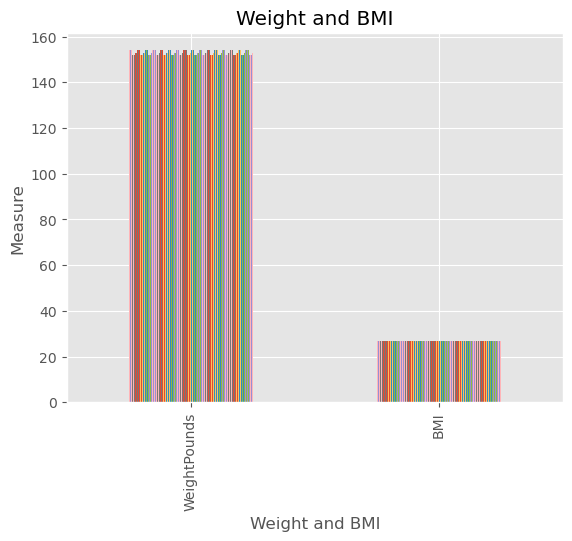

In [272]:
weight_bmi.plot(kind='bar')


plt.title('Weight and BMI')
plt.ylabel('Measure')
plt.xlabel('Weight and BMI')


plt.legend().remove()


plt.show()

The average weight of all users is 153 lbs.

In [259]:
bmi.describe()

count    10000.0
mean        27.0
std          0.0
min         27.0
25%         27.0
50%         27.0
75%         27.0
max         27.0
Name: BMI, dtype: float64

The average BMI of all users is 27. A BMI of 27 is considered overweight.

Data read into a pandas dataframe!


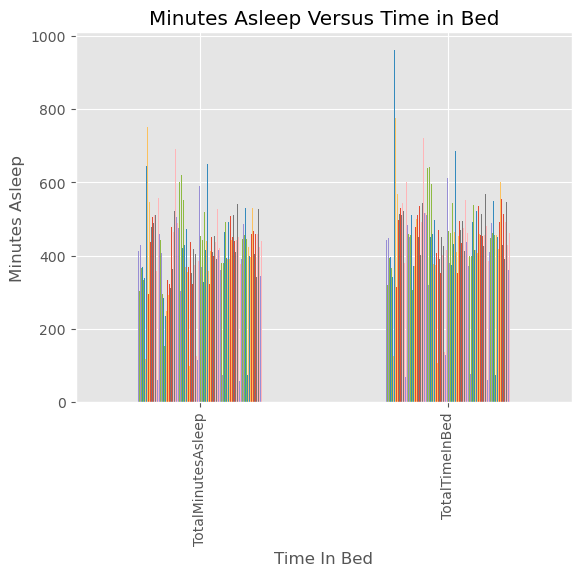

In [286]:
df_sleep = pd.read_csv('sleep_per_day.csv')
print('Data read into a pandas dataframe!')

df_sleep = df_sleep[:10000]

df_sleep.head()

bed_sleep = df_sleep[['TotalMinutesAsleep','TotalTimeInBed']]

bed_sleep = bed_sleep.astype(int)

bed_sleep = bed_sleep.transpose()
bed_sleep.head()

bed_sleep.plot(kind='bar')


plt.title('Minutes Asleep Versus Time in Bed')
plt.ylabel('Minutes Asleep')
plt.xlabel('Time In Bed')


plt.legend().remove()


plt.show()



The time most users spend in bed is slightly greater than the minutes spent asleep.  That means users are not always able to sleep although they are in bed.

What we can conclude is that the majority of device users are lightly active and workout for a light amount of minutes each day.  Their average daily calories are 1985.  

As users are more active in a day, total calories decrease.  Total calories also increase per hour and minute, as the intensity of workouts increases.  Being "veryactive" in a day leads to a more drastic reduction in calories than "lightlyactive", although both decrease total calories.  

Currently, most users are overweight. They are spending more time in bed and not getting all of these minutes in sleep.  

We can ascertain that device users can be a lot more active so that they can achieve a healthier weight and be able to fall asleep when they go to bed.
Most users are only lightly active and not burning as many calories as they can.  

BellaBeats' goal should be to encourage users to become more active and for a longer time each day.  Marketing campaigns can focus on promoting physical activity that requires a higher intensity level and help users lose weight. 

Current activities may include light exercise like walking or yoga. Users may not even workout at all. 

The goal is to help device users embrace more intense workouts.  These may include running, sports like soccer or hiking with groups.  When users will engage in more intense fitness activities, this will help them burn more calories per minute, hour and day. 

This leads to further questions about what activities current users are in fact, engaging in.  How can BellaBeats help users embrace a more "fit" lifestyle and achieve a healthier BMI? 